In [ ]:
from selenium.webdriver.common.by import By
from selenium import webdriver
import time
from selenium.webdriver.chrome.options import Options
import os
import xlwings as xw
import pygetwindow as gw
import pyautogui

chromeOptions = Options()


url = 'https://www.banki.ru/services/responses/'

driver = webdriver.Chrome(executable_path='C:\\chromedriver88\\chromedriver.exe', chrome_options=chromeOptions)

# Navigate to the page with the input field
driver.get(url)

C:\Users\andru\AppData\Local\Temp\ipykernel_22560\257505657.py:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='C:\\chromedriver88\\chromedriver.exe', chrome_options=chromeOptions)
C:\Users\andru\AppData\Local\Temp\ipykernel_22560\257505657.py:15: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(executable_path='C:\\chromedriver88\\chromedriver.exe', chrome_options=chromeOptions)


SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 115
Current browser version is 117.0.5938.63 with binary path C:\Program Files\Google\Chrome\Application\chrome.exe
Stacktrace:
Backtrace:
	GetHandleVerifier [0x00007FF6E5BC3E62+57250]
	(No symbol) [0x00007FF6E5B3BC02]
	(No symbol) [0x00007FF6E5A0E0BB]
	(No symbol) [0x00007FF6E5A39DCB]
	(No symbol) [0x00007FF6E5A34D7D]
	(No symbol) [0x00007FF6E5A32E9A]
	(No symbol) [0x00007FF6E5A6E1E7]
	(No symbol) [0x00007FF6E5A6DD50]
	(No symbol) [0x00007FF6E5A66583]
	(No symbol) [0x00007FF6E5A3CC71]
	(No symbol) [0x00007FF6E5A3DE54]
	GetHandleVerifier [0x00007FF6E5E74CF2+2879026]
	GetHandleVerifier [0x00007FF6E5EC6F30+3215472]
	GetHandleVerifier [0x00007FF6E5EBFD4F+3186319]
	GetHandleVerifier [0x00007FF6E5C55505+652869]
	(No symbol) [0x00007FF6E5B47518]
	(No symbol) [0x00007FF6E5B435F4]
	(No symbol) [0x00007FF6E5B436EC]
	(No symbol) [0x00007FF6E5B338E3]
	BaseThreadInitThunk [0x00007FFA14BC7614+20]
	RtlUserThreadStart [0x00007FFA160A26B1+33]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install chromedriver-py

     -------------------------------------- 39.2/39.2 MB 372.5 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from selenium import webdriver
from chromedriver_py import binary_path
from selenium.webdriver.common.by import By
import time
import os
import xlwings as xw
import pygetwindow as gw
import pyautogui
import emoji


import csv
with open('C://Users//andru//OneDrive//Рабочий стол//NLP — копия.csv', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['Банк', 'Дата отзыва', 'Оценка', 'Отзыв'])
    driver = webdriver.Chrome(executable_path=binary_path)

    url = 'https://www.banki.ru/services/responses/'

    driver.get(url)

    time.sleep(2)

    elems = driver.find_elements(By.XPATH, "//a[@href]")
    links = []
    for elem in elems:
    #     print(elem)
        #print(elem.get_attribute("href"))
        links.append(elem.get_attribute("href"))

    ind_p_2 = links.index('https://www.banki.ru/services/responses/?page=2&date=2023')
    print(ind_p_2)

    write_to_csv = []

    for i in range(len(links)):
    #     datas_of_bank = []
        if 'https://www.banki.ru/services/responses/bank/rosbank/' in links[i] and i<ind_p_2: #надо убрать до responses/
            print(links[i])
            send = links[i]
            name_of_bank = links[i].split('/')
    #         datas_of_bank.append(name_of_bank[-2])
            driver.get(send)

            time.sleep(2)

#             #пробегаемся по странице отзывов банка
#             elems1 = driver.find_elements(By.XPATH, "//a[@href]")
#             links1 = []
#             for elem1 in elems1:
#                 #print(elem1.get_attribute("href"))
#                 links1.append(elem1.get_attribute("href"))

#             ind_p_3 = links1.index('https://www.banki.ru/services/responses/bank/' + name_of_bank[-2] + '/?page=2&is_countable=on')
#             print(ind_p_3)
            for i in range(1, 10):
                pages = 'https://www.banki.ru/services/responses/bank/' + name_of_bank[-2] + '/?page=' + str(i) + '&is_countable=on'
                driver.get(pages)
                s = ''
                time.sleep(5)
                elems1 = driver.find_elements(By.XPATH, "//a[@href]")
    #         datas_of_bank = []
                for elem1 in elems1:
                    try:
                        time.sleep(1)
                        links1 = elem1.get_attribute("href")
                        print(links1)
                    except:
                        links1 = elem1.get_attribute("href")
                        print('ош',links1)

                    datas_of_bank = []
                    if 'https://www.banki.ru/services/responses/bank/response/' in links1 and '#comments' not in links1 and 'page='+str(i+1) not in links1 and links1!=s:
                        s = links1
                        datas_of_bank.append(name_of_bank[-2])
                        driver.get(links1)

                        time.sleep(2)

                        #пробегаемся по конкретному отзыву


                        #получаем дату

                        date = driver.find_element(By.CLASS_NAME, "l10fac986")
                        date = date.text
        #                 print(date)
                        datas_of_bank.append(date)


                        #получаем оценку отзыва
                        mark = driver.find_element(By.CLASS_NAME, "lbb810226")
                        mark = mark.text
    #                     print(mark[-1])
                        datas_of_bank.append(mark[-1])


                        #получаем сам отзыв
                        elements = driver.find_elements(By.TAG_NAME, 'p')
                        review = ''

                        time.sleep(2)

                        for e in elements:
                            try:
                                if e.text != 'Помогите другим пользователям выбрать лучший банк':
                                    review += e.text
                                    review += ' '
                                elif e.text== 'Помогите другим пользователям выбрать лучший банк':
        #                             print(review)
                                    datas_of_bank.append(review)
                                    break
                            except:
                                if e.text != 'Помогите другим пользователям выбрать лучший банк':
                                    review += e.text
                                    review += ' '
                                elif e.text== 'Помогите другим пользователям выбрать лучший банк':
        #                             print(review)
                                    datas_of_bank.append(review)
                                    break

                        try:
    #                     print(datas_of_bank)
    #                     write_to_csv.append(datas_of_bank)
                            spamwriter.writerow(datas_of_bank)

                            driver.back()
                        except:
                            driver.back()


                        #можно делать возврат на предыдущую страницу вот прям на этом уровне
                driver.back()
            driver.back()

#         print(write_to_csv)



C:\Users\andru\AppData\Local\Temp\ipykernel_6792\1517711817.py:17: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=binary_path)


134
https://www.banki.ru/services/responses/bank/sberbank/
https://ads.adfox.ru/402339/clickURL?ad-session-id=1765731695216165366&duid=1695216166158410637&hash=902350bbcea7c3a3&sj=BU3bS4QCdGZniTTOYx5p04UsE-rMcTxwJw0AeTScQ4uDF3PfUPnGiLi0T-_m4w%3D%3D&rand=fkxowgp&rqs=JEa02Fhj3xEw8gpliPy6cmfqXBZ_Avuw&pr=jtfwief&p1=ctauz&ytt=326554953580549&p5=qtknu&ybv=0.870994&p2=hoet&ylv=0.870994&pf=https%3A%2F%2Fad.adriver.ru%2Fcgi-bin%2Fclick.cgi%3Fsid%3D1%26bt%3D21%26ad%3D766601%26pid%3D3735922%26bid%3D9351233%26bn%3D9351233%26exss%3D%26rnd%3D835950135
https://www.banki.ru/
https://www.banki.ru/products/deposits/?source=main_menu_deposits
https://www.banki.ru/credit-master/?source=main_menu_master
https://www.banki.ru/plastic-card-master/?source=main_menu_cardmaster
https://www.banki.ru/products/hypothec/?source=main_menu_hypothec
https://www.banki.ru/insurance/?source=main_menu_insurance
https://www.banki.ru/investment/?source=main_menu_share
https://www.banki.ru/business/?source=topmenu
https://www

https://www.banki.ru/services/responses/bank/response/11033841/#comments
https://www.banki.ru/services/responses/bank/response/11033789/
https://www.banki.ru/services/responses/bank/response/11033789/
https://www.banki.ru/services/responses/bank/response/11033789/#comments
https://www.banki.ru/services/responses/bank/response/11033269/
https://www.banki.ru/services/responses/bank/response/11033269/
https://www.banki.ru/services/responses/bank/response/11033269/#comments
https://www.banki.ru/services/responses/bank/response/11033105/
https://www.banki.ru/services/responses/bank/response/11033105/
https://www.banki.ru/services/responses/bank/response/11033105/#comments
https://www.banki.ru/services/responses/bank/response/11032678/
https://www.banki.ru/services/responses/bank/response/11032678/
https://www.banki.ru/services/responses/bank/response/11032678/#comments
https://www.banki.ru/services/responses/bank/response/11032521/
https://www.banki.ru/services/responses/bank/response/11032

https://www.banki.ru/services/responses/bank/sberbank/product/other/
https://www.banki.ru/insurance/order/tourism/
https://www.banki.ru/insurance/order/auto/type/osago/?osagoseo=3
https://www.banki.ru/insurance/order/auto/type/kasko/
https://www.banki.ru/insurance/order/realty/mortgage/
https://www.banki.ru/services/calculators/deposits/
https://www.banki.ru/services/calculators/credits/
https://www.banki.ru/services/calculators/hypothec/
https://www.banki.ru/services/calculators/autocredits/
https://www.banki.ru/products/deposits/sberbank/
https://www.banki.ru/products/deposits/pochtabank/
https://www.banki.ru/products/deposits/catalogue/vkladyi_v_rublyah/
https://www.banki.ru/products/deposits/catalogue/vkladyi_pod_vyisokiy_protsent/
https://www.banki.ru/products/deposits/catalogue/vkladyi_onlayn/
https://www.banki.ru/investment/mutual/
https://www.banki.ru/products/deposits/search/moskva/
https://www.banki.ru/investment/search/
https://www.banki.ru/investment/shares/
https://www.ban

https://www.banki.ru/insurance/order/auto/type/osago/elektronnoe_osago/company/zettastrahovanie/
https://www.banki.ru/products/hypothec/search/
https://www.banki.ru/products/hypothec/catalogue/semeynaya_ipoteka/
https://www.banki.ru/products/hypothec/catalogue/ipoteka_pod_65_protsentov/
https://www.banki.ru/products/hypothec/catalogue/ipotechnyiy_kredit_bez_pervonachalnogo_vznosa/
https://www.banki.ru/products/hypothec/catalogue/ipoteka_molodaya_semya/
https://www.banki.ru/products/hypothec/catalogue/ipoteka_na_kvartiru_na_vtorichnom_ryinke/
https://www.banki.ru/products/hypothec/catalogue/voennaya_ipoteka/
https://www.banki.ru/products/hypothec/catalogue/ipoteka_s_gosudarstvennoy_podderjkoy/
https://www.banki.ru/products/hypothec/catalogue/selskaya_ipoteka/
https://www.banki.ru/products/hypothec/catalogue/refinansirovanie_ipoteki/
https://www.banki.ru/products/deposits/catalogue/pensionnyie_vkladyi/
https://www.banki.ru/products/deposits/
https://www.banki.ru/products/deposits/catalog

In [62]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/reviews.csv', encoding = "utf-8")

# Проверяем, что данные прочитаны:
df.head(5)

,Unnamed: 0,login,city,reputation,amount_reviews,movie,header,published_date,plus,minus,text,recommendation,rate
0,0,Neo,"Россия, СТАРОЖИЛ",826282,3152,50 оттенков серого,"Отзыв: Фильм ""50 оттенков серого"" (2015) - Гла...",2015-02-16,ну вроде как скучно не было,"поверхностно, ""деревянный"" Кристиан, слишком с...",Ну что сказать... посмотрела я наконец то сей ...,Рекомендуют 59%,3
1,1,Скакалка,"Украина, Краматорск",30191,399,50 оттенков серого,"Отзыв: Фильм ""50 оттенков серого"" (2015) - Плю...",2015-02-11,"качественная экранизация, хорошая игра актеров",много спойлер информации перед премьерой,Спешу поделиться своими впечатлениями о самом ...,Рекомендуют 59%,5
2,2,Елена Ч,"Россия, Екатеринбург",84141,1199,50 оттенков серого,"Отзыв: Фильм ""50 оттенков серого"" (2015) - Хот...",2015-02-13,ночные виды города красивы.,"актёры, сюжет.","Громкая реклама, не часто такого план фильм по...",Рекомендуют 59%,3
3,3,kalella,"Россия, Москва",244417,2813,50 оттенков серого,"Отзыв: Фильм ""50 оттенков серого"" (2015) - Есл...",2015-02-18,"Качественная ""картинка фильма"", музыка, настро...",Невероятно обкромсаный сюжет.,"По правде сказать, придя сегодня в кинотеатр н...",Рекомендуют 59%,3
4,4,Julianna7,"Россия, Москва",20467,388,50 оттенков серого,"Отзыв: Фильм ""50 оттенков серого"" (2015) - Оче...",2015-02-10,От фильма в полном восторге! Экранизация удала...,"Их нет. Эротика - не минус, а изюминка этого ф...",Я увидела этот фильм!! Ура-ура! Много эмоций о...,Рекомендуют 59%,5


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1752 non-null   int64 
 1   login           1752 non-null   object
 2   city            1729 non-null   object
 3   reputation      1752 non-null   int64 
 4   amount_reviews  1752 non-null   int64 
 5   movie           1752 non-null   object
 6   header          1752 non-null   object
 7   published_date  1752 non-null   object
 8   plus            1752 non-null   object
 9   minus           1752 non-null   object
 10  text            1752 non-null   object
 11  recommendation  1752 non-null   object
 12  rate            1752 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 178.1+ KB


<Axes: ylabel='rate'>

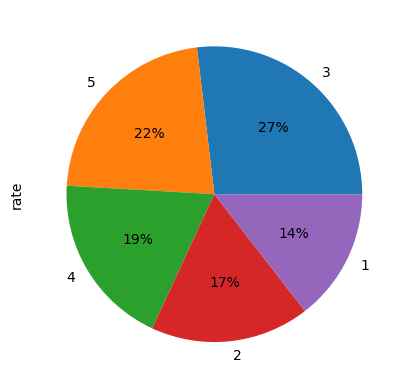

In [64]:
df['rate'].value_counts().plot(kind='pie', autopct='%1.0f%%')

## Выбор нужных столбцов

In [65]:
import pandas as pd
new_df = df[['movie', 'published_date', 'text', 'rate']]. copy ()
new_df

,movie,published_date,text,rate
0,50 оттенков серого,2015-02-16,Ну что сказать... посмотрела я наконец то сей ...,3
1,50 оттенков серого,2015-02-11,Спешу поделиться своими впечатлениями о самом ...,5
2,50 оттенков серого,2015-02-13,"Громкая реклама, не часто такого план фильм по...",3
3,50 оттенков серого,2015-02-18,"По правде сказать, придя сегодня в кинотеатр н...",3
4,50 оттенков серого,2015-02-10,Я увидела этот фильм!! Ура-ура! Много эмоций о...,5
...,...,...,...,...
1747,Матрица: Воскрешение,2021-12-31,"Посмотрел с удовольствием.\nРежиссер, писатель...",4
1748,Матрица: Воскрешение,2022-02-28,Посмотрел данный фильм и у меня остались очень...,2
1749,Матрица: Воскрешение,2022-02-21,Интересно вот когда эта снимали они сами то см...,2
1750,Матрица: Воскрешение,2021-12-24,Я ожидала от этого фильма намного больше эмоци...,2


In [66]:
unique_words = new_df['text'].str.split().explode().nunique()
print('Количество уникальных слов:', unique_words)

Количество уникальных слов: 51972


In [67]:
print(new_df['text'])

0       Ну что сказать... посмотрела я наконец то сей ...
1       Спешу поделиться своими впечатлениями о самом ...
2       Громкая реклама, не часто такого план фильм по...
3       По правде сказать, придя сегодня в кинотеатр н...
4       Я увидела этот фильм!! Ура-ура! Много эмоций о...
                              ...                        
1747    Посмотрел с удовольствием.\nРежиссер, писатель...
1748    Посмотрел данный фильм и у меня остались очень...
1749    Интересно вот когда эта снимали они сами то см...
1750    Я ожидала от этого фильма намного больше эмоци...
1751    "Любовь, как чудо-птица Феникс —\nСовсем вчера...
Name: text, Length: 1752, dtype: object


## Облако слов до удаления стоп-слов

In [13]:
pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

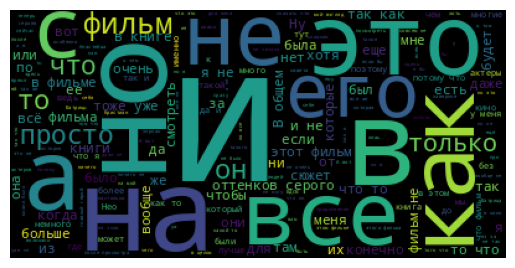

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(new_df['text'])

# Генерируем облако слов и сохраняем в переменной cloud
cloud = WordCloud().generate(text)
# Выводим облако слов на экран
plt.imshow(cloud)
# Отключаем отображение осей
plt.axis('off')

## Создаем облако слов после удаления стоп-слов

(-0.5, 399.5, 199.5, -0.5)

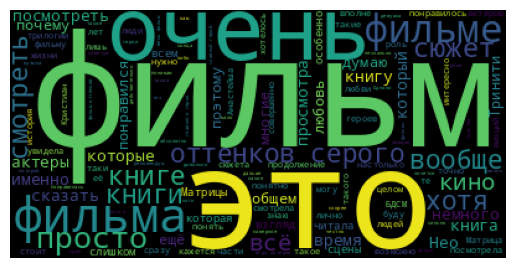

In [69]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# подгружаем библиотеку nltk со стоп-словами
from nltk.corpus import stopwords
# сохраняем список с русскими стоп-cловами в переменную stop_words
stop_words = stopwords.words('russian')

text = ' '.join(new_df['text'])

# Определяем параметр stopwords при создании объекта облака слов
cloud = WordCloud(stopwords=stop_words).generate(text)

plt.imshow(cloud)
plt.axis('off')

## Разбиваем текст на токены и получаем леммы

In [70]:
print(new_df['text'])

0       Ну что сказать... посмотрела я наконец то сей ...
1       Спешу поделиться своими впечатлениями о самом ...
2       Громкая реклама, не часто такого план фильм по...
3       По правде сказать, придя сегодня в кинотеатр н...
4       Я увидела этот фильм!! Ура-ура! Много эмоций о...
                              ...                        
1747    Посмотрел с удовольствием.\nРежиссер, писатель...
1748    Посмотрел данный фильм и у меня остались очень...
1749    Интересно вот когда эта снимали они сами то см...
1750    Я ожидала от этого фильма намного больше эмоци...
1751    "Любовь, как чудо-птица Феникс —\nСовсем вчера...
Name: text, Length: 1752, dtype: object


In [33]:
pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32896 sha256=357f1abc009ff316d8c303dd5df82f89909883dcef527e4021c4a15531b30f02
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [32]:
import stopwords
stop_words = stopwords.words('russian')

AttributeError: ignored

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(-0.5, 399.5, 199.5, -0.5)

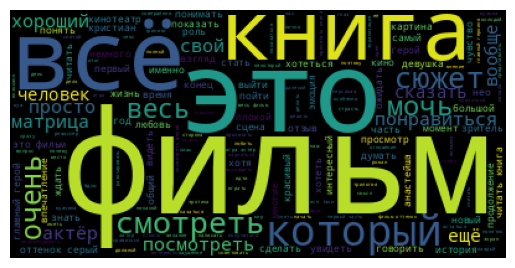

In [71]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Импортируем библиотеку для лемматизации русских и украинских слов
import pymorphy2
# Импортируем метод word_tokenize из библиотеки nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))

nltk.download('punkt')


text = ' '.join(new_df['text'])

# разбиваем текст на токены
# в результате получаем переменную типа list со списком токенов
text = word_tokenize(text)

# инициализируем лемматайзер MorphAnalyzer()
lemmatizer = pymorphy2.MorphAnalyzer()

# функция для лемматизации текста, на вхд принимает список токенов
def lemmatize_text(tokens):
    # создаем переменную для хранения преобразованного текста
    text_new=''
    # для каждого токена в тексте
    for word in tokens:
        # с помощью лемматайзера получаем основную форму
        word = lemmatizer.parse(word)
        # добавляем полученную лемму в переменную с преобразованным текстом
        text_new = text_new + ' ' + word[0].normal_form
    # возвращаем преобразованный текст
    return text_new

# вызываем функцию лемматизации для списка токенов исходного текста
text = lemmatize_text(text)

#генерируем облако слов
cloud = WordCloud(stopwords=stop_words).generate(text)
plt.imshow(cloud)
plt.axis('off')

## Присоединение обработанного текста к datadrame

In [72]:
print(new_df)

                     movie published_date  \
0       50 оттенков серого     2015-02-16   
1       50 оттенков серого     2015-02-11   
2       50 оттенков серого     2015-02-13   
3       50 оттенков серого     2015-02-18   
4       50 оттенков серого     2015-02-10   
...                    ...            ...   
1747  Матрица: Воскрешение     2021-12-31   
1748  Матрица: Воскрешение     2022-02-28   
1749  Матрица: Воскрешение     2022-02-21   
1750  Матрица: Воскрешение     2021-12-24   
1751  Матрица: Воскрешение     2021-12-29   

                                                   text  rate  
0     Ну что сказать... посмотрела я наконец то сей ...     3  
1     Спешу поделиться своими впечатлениями о самом ...     5  
2     Громкая реклама, не часто такого план фильм по...     3  
3     По правде сказать, придя сегодня в кинотеатр н...     3  
4     Я увидела этот фильм!! Ура-ура! Много эмоций о...     5  
...                                                 ...   ...  
1747  Посмо

In [73]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('russian')



#print(df['result'])
df['result'] = new_df['text'].str.replace("[^\w\s]", "")
#make it all lower case
df['result'] = df['result'].apply(lambda x: x.lower())
#Handle strange character in source
df['result'] = df['result'].str.replace("‰Ûª", "''")
df['result'] = df.result.apply(lambda x: [item for item in x.split() if item not in stop])



print(df['result'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-73-9cd2d14b172c>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['result'] = new_df['text'].str.replace("[^\w\s]", "")


0       [сказать, посмотрела, сей, шедевр, нашумевший,...
1       [спешу, поделиться, своими, впечатлениями, сам...
2       [громкая, реклама, часто, такого, план, фильм,...
3       [правде, сказать, придя, сегодня, кинотеатр, ф...
4       [увидела, фильм, ураура, эмоций, просмотра, сл...
                              ...                        
1747    [посмотрел, удовольствием, режиссер, писатель,...
1748    [посмотрел, данный, фильм, остались, очень, см...
1749    [интересно, эта, снимали, сами, смотрели, наше...
1750    [ожидала, фильма, намного, эмоций, вообще, стр...
1751    [любовь, чудоптица, феникс, вчера, умерла, пеп...
Name: result, Length: 1752, dtype: object


In [74]:
new_df['result'] = df['result']

In [75]:
print(new_df)

                     movie published_date  \
0       50 оттенков серого     2015-02-16   
1       50 оттенков серого     2015-02-11   
2       50 оттенков серого     2015-02-13   
3       50 оттенков серого     2015-02-18   
4       50 оттенков серого     2015-02-10   
...                    ...            ...   
1747  Матрица: Воскрешение     2021-12-31   
1748  Матрица: Воскрешение     2022-02-28   
1749  Матрица: Воскрешение     2022-02-21   
1750  Матрица: Воскрешение     2021-12-24   
1751  Матрица: Воскрешение     2021-12-29   

                                                   text  rate  \
0     Ну что сказать... посмотрела я наконец то сей ...     3   
1     Спешу поделиться своими впечатлениями о самом ...     5   
2     Громкая реклама, не часто такого план фильм по...     3   
3     По правде сказать, придя сегодня в кинотеатр н...     3   
4     Я увидела этот фильм!! Ура-ура! Много эмоций о...     5   
...                                                 ...   ...   
1747

<Axes: >

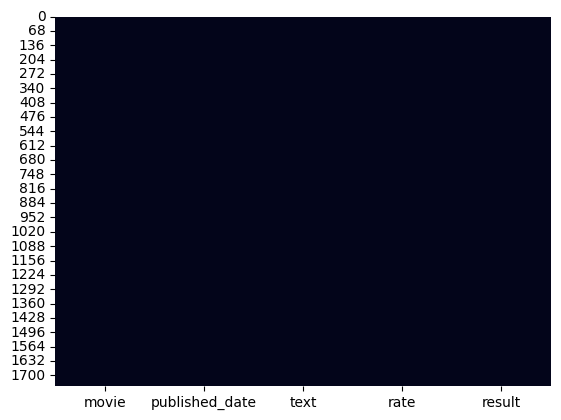

In [76]:
import seaborn as sns
sns.heatmap(new_df.isnull(), cbar=False)

In [77]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   movie           1752 non-null   object
 1   published_date  1752 non-null   object
 2   text            1752 non-null   object
 3   rate            1752 non-null   int64 
 4   result          1752 non-null   object
dtypes: int64(1), object(4)
memory usage: 68.6+ KB


## Перевод объекта даты в дату

In [78]:
# Перевод объекта даты в дату
new_df['published_date'] = pd.to_datetime(new_df['published_date'])

## Средний рейтинг по году и названию фильма


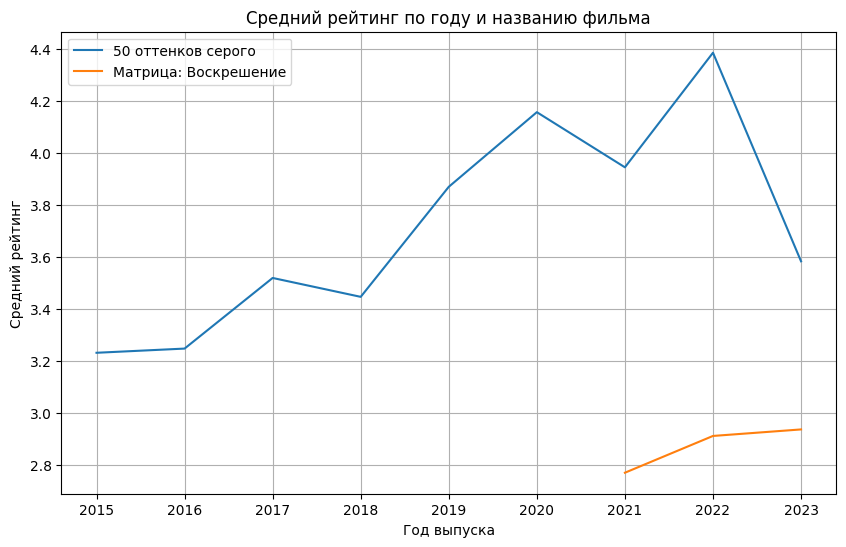

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Группировка данных по году и названию фильма и вычисление среднего рейтинга
new_df['year'] = new_df['published_date'].dt.year
average_ratings = new_df.groupby(['year', 'movie'])['rate'].mean().reset_index()


# Создание графика
plt.figure(figsize=(10, 6))
for title, group in average_ratings.groupby('movie'):
    plt.plot(group['year'], group['rate'], label=title)


plt.xlabel('Год выпуска')
plt.ylabel('Средний рейтинг')
plt.legend(loc='best')
plt.title('Средний рейтинг по году и названию фильма')
plt.grid(True)
plt.show()

In [80]:
new_df.info()
new_df['movie'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   movie           1752 non-null   object        
 1   published_date  1752 non-null   datetime64[ns]
 2   text            1752 non-null   object        
 3   rate            1752 non-null   int64         
 4   result          1752 non-null   object        
 5   year            1752 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 82.2+ KB


array(['50 оттенков серого', 'Матрица: Воскрешение'], dtype=object)

## Удаление столбцов

In [61]:
print(new_df)

                     movie published_date  rate  \
0       50 оттенков серого     2015-02-16     3   
1       50 оттенков серого     2015-02-11     5   
2       50 оттенков серого     2015-02-13     3   
3       50 оттенков серого     2015-02-18     3   
4       50 оттенков серого     2015-02-10     5   
...                    ...            ...   ...   
1747  Матрица: Воскрешение     2021-12-31     4   
1748  Матрица: Воскрешение     2022-02-28     2   
1749  Матрица: Воскрешение     2022-02-21     2   
1750  Матрица: Воскрешение     2021-12-24     2   
1751  Матрица: Воскрешение     2021-12-29     1   

                                                 result  year  
0     [сказать, посмотрела, сей, шедевр, нашумевший,...  2015  
1     [спешу, поделиться, своими, впечатлениями, сам...  2015  
2     [громкая, реклама, часто, такого, план, фильм,...  2015  
3     [правде, сказать, придя, сегодня, кинотеатр, ф...  2015  
4     [увидела, фильм, ураура, эмоций, просмотра, сл...  2015  
...

In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   movie           1752 non-null   object        
 1   published_date  1752 non-null   datetime64[ns]
 2   text            1752 non-null   object        
 3   rate            1752 non-null   int64         
 4   result          1752 non-null   object        
 5   year            1752 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 82.2+ KB


## Логистическая регрессия

In [81]:
lin_df = new_df
print(lin_df)

                     movie published_date  \
0       50 оттенков серого     2015-02-16   
1       50 оттенков серого     2015-02-11   
2       50 оттенков серого     2015-02-13   
3       50 оттенков серого     2015-02-18   
4       50 оттенков серого     2015-02-10   
...                    ...            ...   
1747  Матрица: Воскрешение     2021-12-31   
1748  Матрица: Воскрешение     2022-02-28   
1749  Матрица: Воскрешение     2022-02-21   
1750  Матрица: Воскрешение     2021-12-24   
1751  Матрица: Воскрешение     2021-12-29   

                                                   text  rate  \
0     Ну что сказать... посмотрела я наконец то сей ...     3   
1     Спешу поделиться своими впечатлениями о самом ...     5   
2     Громкая реклама, не часто такого план фильм по...     3   
3     По правде сказать, придя сегодня в кинотеатр н...     3   
4     Я увидела этот фильм!! Ура-ура! Много эмоций о...     5   
...                                                 ...   ...   
1747

In [82]:
new_df

,movie,published_date,text,rate,result,year
0,50 оттенков серого,2015-02-16,Ну что сказать... посмотрела я наконец то сей ...,3,"[сказать, посмотрела, сей, шедевр, нашумевший,...",2015
1,50 оттенков серого,2015-02-11,Спешу поделиться своими впечатлениями о самом ...,5,"[спешу, поделиться, своими, впечатлениями, сам...",2015
2,50 оттенков серого,2015-02-13,"Громкая реклама, не часто такого план фильм по...",3,"[громкая, реклама, часто, такого, план, фильм,...",2015
3,50 оттенков серого,2015-02-18,"По правде сказать, придя сегодня в кинотеатр н...",3,"[правде, сказать, придя, сегодня, кинотеатр, ф...",2015
4,50 оттенков серого,2015-02-10,Я увидела этот фильм!! Ура-ура! Много эмоций о...,5,"[увидела, фильм, ураура, эмоций, просмотра, сл...",2015
...,...,...,...,...,...,...
1747,Матрица: Воскрешение,2021-12-31,"Посмотрел с удовольствием.\nРежиссер, писатель...",4,"[посмотрел, удовольствием, режиссер, писатель,...",2021
1748,Матрица: Воскрешение,2022-02-28,Посмотрел данный фильм и у меня остались очень...,2,"[посмотрел, данный, фильм, остались, очень, см...",2022
1749,Матрица: Воскрешение,2022-02-21,Интересно вот когда эта снимали они сами то см...,2,"[интересно, эта, снимали, сами, смотрели, наше...",2022
1750,Матрица: Воскрешение,2021-12-24,Я ожидала от этого фильма намного больше эмоци...,2,"[ожидала, фильма, намного, эмоций, вообще, стр...",2021


In [106]:
lin_df['result'] = lin_df['result'].map(lambda x: ' '.join(x))
sent = lin_df['result']
rating = lin_df['rate']

In [108]:
sent[0]

'сказать посмотрела сей шедевр нашумевший весьма ожидаемый наших женских кругах книгу читала честно надеялась хотя кинематографическое искусство спасет убогий слог произведения печатного мере это удалось создалось впечатление те эпизоды включил фильм развитие событий стремительно факт книжку читал ориентируешься сюжетной линии делает фильм понятным мужчины которых жены приволокли фильм которые читали книгу спрашивали жен сие мягко говоря мало мужчин принципе восторге потащили именно фильм невольно проводишь аналогию сумерками время просмотра мало оттенки сути фанфик сумерек оттенках пара моментов которые прямо точь точь сумерках текст практически дословный ах опасен беги ах могу оторваться чувствуете прям это слышали сумерки это девочек 1012 лет которые ах какие романтичные 50 оттенков серого девочек фазе острого полового созревания сильно интересует физическая сторона любви возраст 1416 лет странно говорить актерах анастейша понравилась кристиан рыба мясо хаял дескать фигура анастейши

In [100]:
lin_df['result']

0       [сказать, посмотрела, сей, шедевр, нашумевший,...
1       [спешу, поделиться, своими, впечатлениями, сам...
2       [громкая, реклама, часто, такого, план, фильм,...
3       [правде, сказать, придя, сегодня, кинотеатр, ф...
4       [увидела, фильм, ураура, эмоций, просмотра, сл...
                              ...                        
1747    [посмотрел, удовольствием, режиссер, писатель,...
1748    [посмотрел, данный, фильм, остались, очень, см...
1749    [интересно, эта, снимали, сами, смотрели, наше...
1750    [ожидала, фильма, намного, эмоций, вообще, стр...
1751    [любовь, чудоптица, феникс, вчера, умерла, пеп...
Name: result, Length: 1752, dtype: object

In [109]:
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import seaborn


df = []
accuracy_list = []
runtime = []
test_time = []
training_time = []
X_train, X_test, y_train, y_test = train_test_split(sent, rating, test_size=0.15, random_state=42)

vectorizer = TfidfVectorizer()
vectors_train = vectorizer.fit_transform(X_train)
vectors_test = vectorizer.transform(X_test)

## LogisticRegression



Accuracy:  0.414


<Axes: >

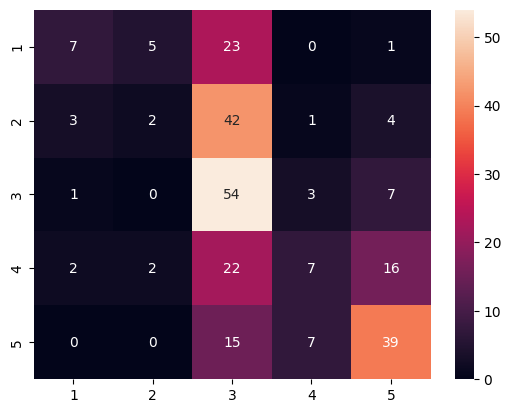

In [110]:
clf_LR = LogisticRegression()
start = time.time()
clf_LR.fit(vectors_train, y_train)
train = round(time.time() - start, 4)
y_pred_LR = clf_LR.predict(vectors_test)
f1_score_LR = round(f1_score(y_test, y_pred_LR, average='micro'), 3)
run = round(time.time() - start, 4)
accuracy_list.append(f1_score_LR)
print('Accuracy: ', f1_score_LR)
test = round(run - train, 4)
df.append(['Logistic Regression', run, train, test, f1_score_LR])
seaborn.heatmap(confusion_matrix(y_test, y_pred_LR), annot=True, xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])

## KNeighborsClassifier

Accuracy:  0.319


<Axes: >

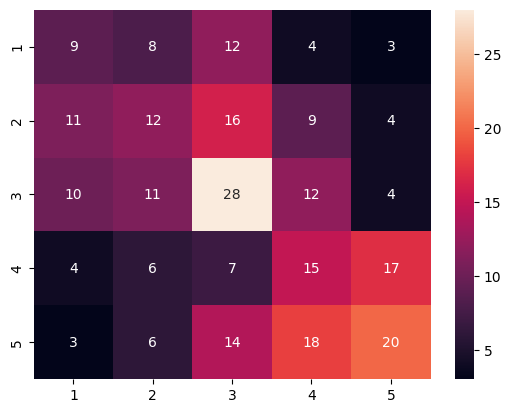

In [111]:
clf_KNC = KNeighborsClassifier()
start = time.time()
clf_KNC.fit(vectors_train, y_train)
train = round(time.time() - start, 4)
y_pred_KNC = clf_KNC.predict(vectors_test)
f1_score_KNC = round(f1_score(y_test, y_pred_KNC, average='micro'), 3)
run = round(time.time() - start, 4)
accuracy_list.append(f1_score_KNC)
print('Accuracy: ', f1_score_KNC)
test = round(run - train, 4)
df.append(['k Nearest Neighbor', run, train, test, f1_score_KNC])
seaborn.heatmap(confusion_matrix(y_test, y_pred_KNC), annot=True, xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])

## RandomForestClassifier

Accuracy:  0.361


<Axes: >

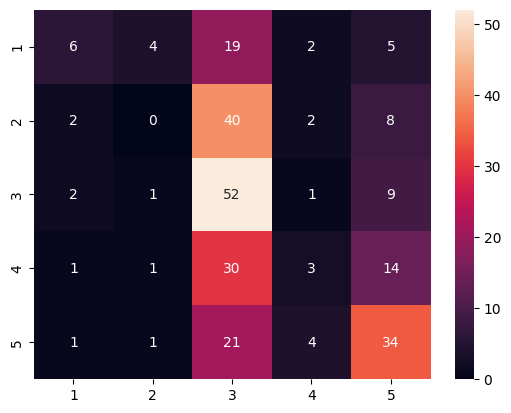

In [112]:
clf_RFC = RandomForestClassifier()
start = time.time()
clf_RFC.fit(vectors_train, y_train)
train = round(time.time() - start, 4)
y_pred_RFC = clf_RFC.predict(vectors_test)
f1_score_RFC = round(f1_score(y_test, y_pred_RFC, average='micro'), 3)
run = round(time.time() - start, 4)
accuracy_list.append(f1_score_RFC)
print('Accuracy: ', f1_score_RFC)
test = round(run - train, 4)
df.append(['Random forest', run, train, test, f1_score_RFC])
seaborn.heatmap(confusion_matrix(y_test, y_pred_RFC), annot=True, xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])

## DecisionTreeClassifier

Accuracy:  0.308


<Axes: >

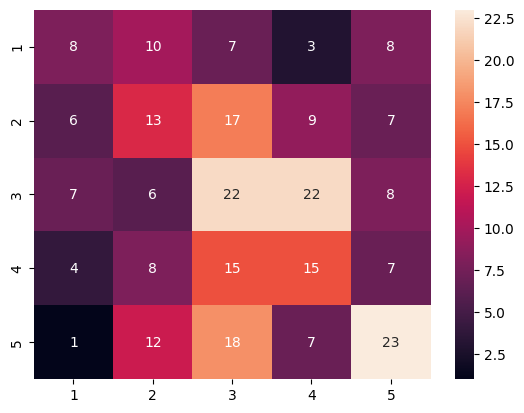

In [113]:
clf_DTC = DecisionTreeClassifier()
start = time.time()
clf_DTC.fit(vectors_train, y_train)
train = round(time.time() - start, 4)
y_pred_DTC = clf_DTC.predict(vectors_test)
f1_score_DTC = round(f1_score(y_test, y_pred_DTC, average='micro'), 3)
run = round(time.time() - start, 4)
accuracy_list.append(f1_score_DTC)
print('Accuracy: ', f1_score_DTC)
test = round(run - train, 4)
df.append(['Decision tree', run, train, test, f1_score_DTC])
seaborn.heatmap(confusion_matrix(y_test, y_pred_DTC), annot=True, xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])

## Дополнительное задание

In [119]:
import string
from nltk.corpus import stopwords
from pymorphy2.tokenizers import simple_word_tokenize


string_test = '''
было больно смотреть на то как актеры пытаются что-то сыграть, но ничего так и не выходит. Звукорежиссер не справлялся со своей работой. Люди в зале мешали смотреть. единственная заслуга фильма - красивая картинка
'''
string = ' '.join([word.lower() for word in simple_word_tokenize(string_test) if word not in stopwords.words('russian') and word not in string.punctuation])
string_test = lemmatize_text(string)
vector = vectorizer.transform([string_test])
pred = clf_LR.predict(vector)
pred

array([3])

In [21]:
pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 67.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=18925de3e429fb525bd710bab4188aec453515e96f2e80cf8aea411da74823c2
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [24]:
!pip install nltk

In [ ]:
!pip install nltk.tokenize

ERROR: Could not find a version that satisfies the requirement nltk.tokenize (from versions: none)
ERROR: No matching distribution found for nltk.tokenize
